In [1]:
!python --version

Python 3.12.4


In [2]:
import pandas as pd

In [3]:
df_target_local_path = 'df_target_30k.csv'
df_bki_local_path = 'df_BKI_30k.csv'

In [4]:
df_target = pd.read_csv(df_target_local_path)

In [5]:
df_target.head(1)

,application_id,client_id,target
0,51534101,15914127,0


In [6]:
df_target_info = {
    "shape": df_target.shape,
    "columns": df_target.columns.tolist(),
    "missing_values": df_target.isnull().sum().to_dict(),
    "unique_values": df_target.nunique().to_dict(),
}
target_distribution = df_target['target'].value_counts(normalize=True)

In [7]:
df_target_info, target_distribution

({'shape': (30000, 3),
  'columns': ['application_id', 'client_id', 'target'],
  'missing_values': {'application_id': 0, 'client_id': 0, 'target': 0},
  'unique_values': {'application_id': 30000, 'client_id': 30000, 'target': 2}},
 target
 0    0.786833
 1    0.213167
 Name: proportion, dtype: float64)

In [8]:
df_bki = pd.read_csv(df_bki_local_path)

C:\Users\serga\AppData\Local\Temp\ipykernel_41620\332090967.py:1: DtypeWarning: Columns (40,42,43,44,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bki = pd.read_csv(df_bki_local_path)


In [9]:
df_bki.dtypes

application_id        int64
client_id             int64
equifax_id            int64
reporting_dt         object
account_uid           int64
                     ...   
delay60               int64
delay90               int64
delay_more            int64
cred_max_overdue    float64
attr_value           object
Length: 92, dtype: object

In [10]:
df_bki.head(1).transpose()

,0
application_id,51859026
client_id,15984285
equifax_id,9344571
reporting_dt,2023-08-01
account_uid,902086582865039990
...,...
delay60,0
delay90,1
delay_more,16
cred_max_overdue,113333.27


In [11]:
df_bki_info = {
        "shape": df_bki.shape,
        "missing_values": df_bki.isnull().sum().to_dict(),
        "unique_values": df_bki.nunique().to_dict(),
    }

In [12]:
df_bki_info

{'shape': (481335, 92),
 'missing_values': {'application_id': 0,
  'client_id': 0,
  'equifax_id': 0,
  'reporting_dt': 0,
  'account_uid': 0,
  'fund_date': 1946,
  'trade_owner_indic': 1667,
  'trade_opened_dt': 1,
  'trade_trade_type_code': 1,
  'trade_loan_kind_code': 145,
  'trade_acct_type1': 528,
  'trade_is_consumer_loan': 120,
  'trade_has_card': 0,
  'trade_is_novation': 0,
  'trade_is_money_source': 30643,
  'trade_close_dt': 3589,
  'account_amt_credit_limit': 0,
  'account_amt_currency_code': 0,
  'account_amt_ensured_amt': 444020,
  'coborrower_has_solidary': 115789,
  'coborrower_solidary_num': 480706,
  'paymnt_condition_principal_terms_amt': 166931,
  'paymnt_condition_principal_terms_amt_dt': 360638,
  'paymnt_condition_interest_terms_amt': 304541,
  'paymnt_condition_interest_terms_amt_dt': 360431,
  'paymnt_condition_terms_frequency': 353230,
  'paymnt_condition_min_paymt': 469227,
  'paymnt_condition_grace_start_dt': 474543,
  'paymnt_condition_grace_end_dt': 47436

In [13]:
df_bki.head(5)

,application_id,client_id,equifax_id,reporting_dt,account_uid,fund_date,trade_owner_indic,trade_opened_dt,trade_trade_type_code,trade_loan_kind_code,...,past_due_calc_date,past_due_principal_missed_date,past_due_int_missed_date,delay5,delay30,delay60,delay90,delay_more,cred_max_overdue,attr_value
0,51859026,15984285,9344571,2023-08-01,902086582865039990,2014-07-11,1.0,2014-07-11,1.0,1.0,...,2017-09-20,NaN,NaN,2,2,0,1,16,113333.27,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
1,51859359,15984353,9344781,2023-08-01,654289381013228862,2015-02-13,1.0,2015-02-13,1.0,1.0,...,2020-10-26,NaN,NaN,0,1,0,0,13,77541.87,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSAAAAAAAAAAAA...
2,51859359,15984353,9344781,2023-08-01,741680445545450197,2012-03-21,1.0,2012-03-21,1.0,5.0,...,2023-06-30,2017-02-19,NaN,0,0,0,0,1,101457.30,--543100000AAAAAAAA98765432-------------------...
3,51859863,15984478,9345100,2023-08-01,634072954671362970,2023-05-10,1.0,2023-05-10,1.0,7.0,...,2023-07-27,NaN,NaN,0,0,0,0,0,0.00,-000
4,51860912,15984719,9345907,2023-08-01,446357239045684673,2022-12-11,1.0,2022-12-11,1.0,5.0,...,2023-07-16,NaN,NaN,0,2,0,0,0,1195.90,-22020000


In [14]:
missing_values = df_bki.isnull().sum()
missing_percentage = (missing_values / len(df_bki)) * 100


In [15]:
missing_summary = pd.DataFrame({
    "Missing Count": missing_values,
    "Missing Percentage": missing_percentage
}).sort_values(by="Missing Percentage", ascending=False)

print("Summary of Missing Values:")
print(missing_summary[missing_summary["Missing Count"] > 0])

Summary of Missing Values:
                                  Missing Count  Missing Percentage
collat_repay_amt                         481333           99.999584
collat_repay_code                        481333           99.999584
collat_repay_dt                          481333           99.999584
collat_insured_insur_fact_end_dt         481314           99.995637
collat_insured_insur_end_reason          481314           99.995637
...                                         ...                 ...
trade_acct_type1                            528            0.109695
trade_loan_kind_code                        145            0.030125
trade_is_consumer_loan                      120            0.024931
trade_opened_dt                               1            0.000208
trade_trade_type_code                         1            0.000208

[69 rows x 2 columns]


In [16]:
from src.ml.feature_engineering import generate_base_features
from src.ml.preprocessing import convert_data_types, drop_features
from src.tools.data_config import feature_config,preprocess_config

df_converted = convert_data_types(df_bki,preprocess_config)
df_converted = drop_features(df_converted)
df_aggr = generate_base_features(
    data=df_bki,
    stats_dict=feature_config.agg_dict,
    categorical_features=feature_config.categorical_features
)

In [17]:
from src.ml.feature_engineering import diff_dates,fill_missing_values
from src.tools.data_config import FEATURE_DATE
df_dates = diff_dates(df_aggr, feature_date=FEATURE_DATE)
df_filled = fill_missing_values(df_aggr,how=0)

In [18]:
df_aggr.dtypes

application_id                                  int64
account_uid_count                               int64
fund_date_min                          datetime64[ns]
fund_date_max                          datetime64[ns]
fund_date_<lambda_0>                   datetime64[ns]
                                            ...      
due_arrear_calc_date_diff                       int64
past_due_dt_diff                                int64
past_due_calc_date_diff                         int64
past_due_principal_missed_date_diff             int64
past_due_int_missed_date_diff                   int64
Length: 205, dtype: object

In [19]:
df_aggr.isnull().sum()

application_id                         0
account_uid_count                      0
fund_date_min                          0
fund_date_max                          0
fund_date_<lambda_0>                   0
                                      ..
due_arrear_calc_date_diff              0
past_due_dt_diff                       0
past_due_calc_date_diff                0
past_due_principal_missed_date_diff    0
past_due_int_missed_date_diff          0
Length: 205, dtype: int64

In [20]:
from src.ml.train_preparation import merge_features_target

df_aggr_w_target = merge_features_target(df_aggr,df_target)

In [21]:
df_aggr_w_target

,account_uid_count,fund_date_min,fund_date_max,fund_date_<lambda_0>,trade_opened_dt_min,trade_opened_dt_max,trade_opened_dt_<lambda_0>,trade_close_dt_min,trade_close_dt_max,trade_close_dt_<lambda_0>,...,last_uploaded_dt_diff,arrear_calc_date_diff,due_arrear_start_dt_diff,due_arrear_calc_date_diff,past_due_dt_diff,past_due_calc_date_diff,past_due_principal_missed_date_diff,past_due_int_missed_date_diff,client_id_y,target
application_id,,,,,,,,,,,,,,,,,,,,,
51534101,17,2017-11-01,2023-07-05,1970-01-01 00:00:00.000002072,2017-11-01,2023-07-05,2072,2017-12-01,2027-06-30,3498.0,...,514,514,514,514,512,514,0,512,15914127,0
51534210,17,2022-08-21,2023-07-06,1970-01-01 00:00:00.000000319,2022-08-21,2023-07-06,319,2023-01-09,2023-07-23,195.0,...,512,513,513,513,0,513,0,0,15914149,1
51534377,5,2021-02-08,2023-07-17,1970-01-01 00:00:00.000000889,2021-02-08,2023-07-17,889,2022-01-08,2023-08-16,585.0,...,501,502,502,502,770,502,662,662,8628346,0
51534467,4,2022-10-06,2023-06-15,1970-01-01 00:00:00.000000252,2022-10-05,2023-06-15,253,2024-10-05,2260-12-31,86284.0,...,518,521,521,521,0,521,0,0,15914211,0
51534573,27,2010-05-27,2023-07-15,1970-01-01 00:00:00.000004797,2010-05-27,2023-07-15,4797,2018-11-16,2260-12-31,88434.0,...,502,504,503,504,0,504,0,0,15914238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53149362,4,2022-07-31,2023-07-24,1970-01-01 00:00:00.000000358,2022-07-31,2023-07-20,354,2260-12-31,2260-12-31,0.0,...,442,445,499,445,0,445,0,0,16256193,0
53149374,5,2022-10-23,2023-09-17,1970-01-01 00:00:00.000000329,2022-10-23,2023-09-17,329,2023-06-05,2260-12-31,86772.0,...,440,440,440,440,449,440,449,449,13698851,0
53149390,21,2015-04-27,2023-07-18,1970-01-01 00:00:00.000003004,2015-04-27,2023-07-12,2998,2015-10-27,2260-12-31,89550.0,...,440,443,501,443,0,443,0,0,13552442,0


In [22]:
from src.ml.train_preparation import remove_non_numeric_features

df_aggr_w_target_n = remove_non_numeric_features(df_aggr_w_target)

In [23]:
from src.ml.train_preparation import t_t_split
from src.tools.data_config import TARGET_COLUMN, split_config
train_data, test_data = t_t_split(df=df_aggr_w_target_n,
                                  split_config=split_config,
                                  target_column=TARGET_COLUMN
                                  )

In [24]:
from src.ml.binning import perform_train_binning

train_woe, test_woe = perform_train_binning(
    train_data, test_data, target_column=TARGET_COLUMN
)

(CVXPY) Dec 01 06:35:33 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Dec 01 06:35:33 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [25]:
train_woe

,account_uid_count,trade_opened_dt_<lambda_0>,trade_close_dt_<lambda_0>,account_amt_credit_limit_mean,account_amt_credit_limit_max,account_amt_ensured_amt_mean,account_amt_ensured_amt_max,paymnt_condition_principal_terms_amt_mean,paymnt_condition_principal_terms_amt_max,paymnt_condition_principal_terms_amt_std,...,last_uploaded_dt_diff,arrear_calc_date_diff,due_arrear_start_dt_diff,due_arrear_calc_date_diff,past_due_dt_diff,past_due_calc_date_diff,past_due_principal_missed_date_diff,past_due_int_missed_date_diff,client_id_y,target
application_id,,,,,,,,,,,,,,,,,,,,,
52334521,-0.238062,0.089955,-0.078242,0.271038,0.395519,0.0,0.0,0.140190,0.031837,0.034108,...,0.155379,0.140819,0.013266,0.140819,0.140479,0.140819,0.178423,0.174341,0.025174,0
52944198,0.271676,0.089955,0.152846,-0.195753,0.104430,0.0,0.0,0.031545,0.031837,0.034108,...,0.034453,0.040361,0.014101,0.040361,-0.285076,0.040361,-0.448249,-0.459703,-0.036802,1
53096418,0.271676,0.244890,0.193632,0.157050,0.231130,0.0,0.0,0.002614,0.318936,0.219013,...,0.034453,0.040361,0.014101,0.040361,0.140479,0.040361,0.178423,0.174341,-0.036802,0
53031041,0.026191,-0.118117,-0.333847,-0.195753,-0.333279,0.0,0.0,0.140190,0.318936,0.219013,...,0.034453,0.040361,0.014101,0.040361,0.140479,0.040361,0.178423,0.174341,0.147995,1
52494244,0.060693,0.244890,-0.078242,-0.195753,0.231130,0.0,0.0,0.031545,0.031837,0.034108,...,0.100124,0.140819,0.013266,0.140819,-0.212643,0.140819,-0.763618,-0.683487,-0.036802,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51541848,0.026191,0.089955,-0.078242,0.271038,0.104430,0.0,0.0,-0.192910,-0.219099,-0.236778,...,-0.034619,-0.023204,0.014101,-0.023204,0.140479,-0.023204,0.178423,0.174341,-0.036802,0
51792262,0.271676,0.244890,0.193632,0.271038,0.231130,0.0,0.0,-0.192910,-0.219099,-0.236778,...,-0.034619,-0.023204,0.153780,-0.023204,-0.285076,-0.023204,0.178423,-0.513789,-0.036802,0
51997175,0.271676,0.089955,0.193632,0.271038,0.395519,0.0,0.0,0.140190,0.031837,0.034108,...,-0.034619,-0.023204,0.153780,-0.023204,0.140479,-0.023204,0.178423,0.174341,-0.036802,0


In [26]:
import joblib
from src.tools.data_config import BINNING_FILE
binning_dict = joblib.load(BINNING_FILE)

In [27]:
binning_dict 

{'account_uid_count': OptimalBinning(max_n_bins=5, min_bin_size=0.05, name='account_uid_count'),
 'trade_opened_dt_<lambda_0>': OptimalBinning(max_n_bins=5, min_bin_size=0.05,
                name='trade_opened_dt_<lambda_0>'),
 'trade_close_dt_<lambda_0>': OptimalBinning(max_n_bins=5, min_bin_size=0.05,
                name='trade_close_dt_<lambda_0>'),
 'account_amt_credit_limit_mean': OptimalBinning(max_n_bins=5, min_bin_size=0.05,
                name='account_amt_credit_limit_mean'),
 'account_amt_credit_limit_max': OptimalBinning(max_n_bins=5, min_bin_size=0.05,
                name='account_amt_credit_limit_max'),
 'account_amt_ensured_amt_mean': OptimalBinning(max_n_bins=5, min_bin_size=0.05,
                name='account_amt_ensured_amt_mean'),
 'account_amt_ensured_amt_max': OptimalBinning(max_n_bins=5, min_bin_size=0.05,
                name='account_amt_ensured_amt_max'),
 'paymnt_condition_principal_terms_amt_mean': OptimalBinning(max_n_bins=5, min_bin_size=0.05,
         

In [28]:
from src.tools.analysis import FeatureAnalyser
from src.tools.data_config import feature_thresholds
df_report_dates = (df_bki[['application_id', 'reporting_dt']].copy(deep=True)
              .drop_duplicates())
df_report_dates.set_index('application_id', inplace=True)
feature_analyser = FeatureAnalyser(train_woe=train_woe,test_woe=test_woe, 
                                   target_col=TARGET_COLUMN, df_dates=df_report_dates,
                                   feature_thresholds=feature_thresholds)
feature_analyser.run_analysis()
feature_analyser.save_results('factor_analysis.csv')

In [29]:
binning_results = pd.read_csv('factor_analysis.csv')

In [30]:
binning_results 

,Feature,IV,Gini Train,Gini Test,PSI,Gini Over Time
0,account_uid_count,0.056589,0.130924,0.111873,"{'2023-07-17/2023-07-23': np.float64(0.0), '20...",{'2023-07-17/2023-07-23': np.float64(0.1145664...
1,trade_opened_dt_<lambda_0>,0.046904,0.113249,0.094847,"{'2023-07-17/2023-07-23': np.float64(0.0), '20...",{'2023-07-17/2023-07-23': np.float64(0.1225437...
2,trade_close_dt_<lambda_0>,0.044310,0.114617,0.095766,"{'2023-07-17/2023-07-23': np.float64(0.0), '20...",{'2023-07-17/2023-07-23': np.float64(0.1191573...
3,account_amt_credit_limit_mean,0.051867,0.124190,0.134771,"{'2023-07-17/2023-07-23': np.float64(0.0), '20...",{'2023-07-17/2023-07-23': np.float64(0.1301000...
4,account_amt_credit_limit_max,0.070210,0.147515,0.160790,"{'2023-07-17/2023-07-23': np.float64(0.0), '20...",{'2023-07-17/2023-07-23': np.float64(0.1535242...
...,...,...,...,...,...,...
160,past_due_dt_diff,0.041474,0.107489,0.087333,"{'2023-07-17/2023-07-23': np.float64(0.0), '20...",{'2023-07-17/2023-07-23': np.float64(0.0916704...
161,past_due_calc_date_diff,0.006837,0.038945,0.001248,"{'2023-07-17/2023-07-23': np.float64(0.0), '20...",{'2023-07-17/2023-07-23': np.float64(0.0940259...
162,past_due_principal_missed_date_diff,0.096811,0.137520,0.110269,"{'2023-07-17/2023-07-23': np.float64(0.0), '20...",{'2023-07-17/2023-07-23': np.float64(0.1178252...
163,past_due_int_missed_date_diff,0.095891,0.134422,0.113888,"{'2023-07-17/2023-07-23': np.float64(0.0), '20...",{'2023-07-17/2023-07-23': np.float64(0.0981243...


In [31]:
optb = binning_dict['account_uid_count']

In [32]:
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",2017,0.084042,1435,582,0.288547,-0.403492,0.015240,0.001892
1,"[1.50, 5.50)",6157,0.256542,4582,1575,0.255806,-0.238062,0.015526,0.001936
2,"[5.50, 11.50)",5632,0.234667,4456,1176,0.208807,0.026191,0.000160,0.000020
3,"[11.50, 54.50)",8993,0.374708,7454,1539,0.171133,0.271676,0.025512,0.003179
4,"[54.50, inf)",1201,0.050042,957,244,0.203164,0.060693,0.000181,0.000023
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,24000,1.000000,18884,5116,0.213167,,0.056619,0.007050


In [33]:
optb.binning_table.analysis()

---------------------------------------------
OptimalBinning: Binary Binning Table Analysis
---------------------------------------------

  General metrics

    Gini index               0.13092418
    IV (Jeffrey)             0.05661866
    JS (Jensen-Shannon)      0.00705017
    Hellinger                0.00706371
    Triangular               0.02809323
    KS                       0.10298892
    HHI                      0.27085558
    HHI (normalized)         0.14933151
    Cramer's V               0.09814101
    Quality score            0.19666494

  Monotonic trend                valley

  Significance tests

    Bin A  Bin B  t-statistic      p-value  P[A > B]     P[B > A]
        0      1     8.384208 3.784951e-03  0.998041 1.958762e-03
        1      2    36.318994 1.675232e-09  1.000000 6.172174e-12
        2      3    32.513102 1.183917e-08  1.000000 1.205745e-09
        3      4     7.532381 6.059978e-03  0.002601 9.973985e-01



In [34]:
feature_analyser.filter_features()

In [35]:
feature_analyser.selected_features

['account_uid_count',
 'trade_opened_dt_<lambda_0>',
 'trade_close_dt_<lambda_0>',
 'account_amt_credit_limit_mean',
 'account_amt_credit_limit_max',
 'paymnt_condition_principal_terms_amt_mean',
 'paymnt_condition_principal_terms_amt_max',
 'paymnt_condition_principal_terms_amt_std',
 'paymnt_condition_interest_terms_amt_sum',
 'paymnt_condition_interest_terms_amt_mean',
 'paymnt_condition_interest_terms_amt_max',
 'paymnt_condition_interest_terms_amt_std',
 'month_aver_paymt_aver_paymt_amt_sum',
 'month_aver_paymt_aver_paymt_amt_mean',
 'month_aver_paymt_aver_paymt_amt_max',
 'month_aver_paymt_aver_paymt_amt_std',
 'trade_is_consumer_loan_sum',
 'trade_has_card_sum',
 'trade_has_card_mean',
 'arrear_sign_sum',
 'arrear_sign_mean',
 'arrear_amt_outstanding_sum',
 'arrear_amt_outstanding_mean',
 'arrear_amt_outstanding_max',
 'arrear_principal_outstanding_sum',
 'arrear_principal_outstanding_mean',
 'arrear_principal_outstanding_max',
 'arrear_int_outstanding_sum',
 'arrear_int_outstan

In [36]:
from src.tools.analysis import FeatureSelector

feature_selector = FeatureSelector(feature_analyser)

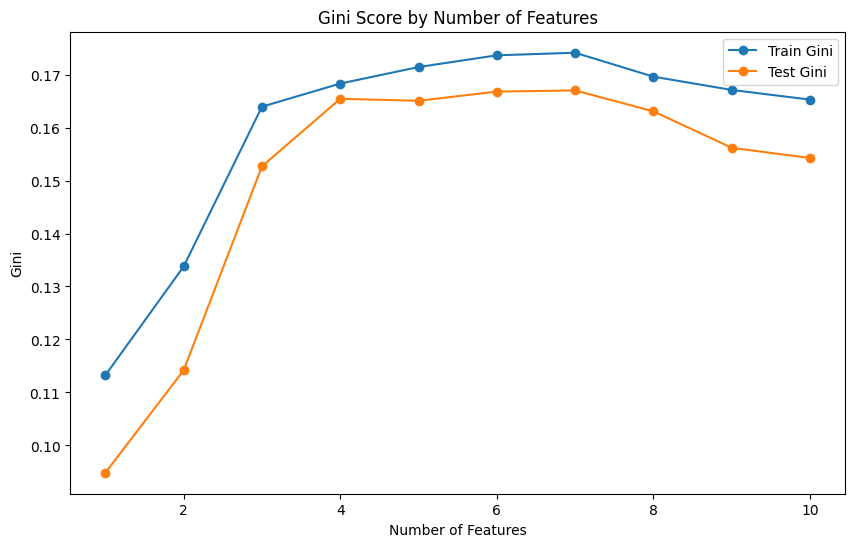

In [37]:
feature_selector.calculate_correlation()
feature_selector.calculate_vif()
feature_selector.calculate_total()
feature_selector.plot_gini_by_features()

In [38]:
cor_df = pd.read_csv('correlation_filtered_features.csv')
cor_df

,Feature,account_uid_count,trade_opened_dt_<lambda_0>,trade_close_dt_<lambda_0>,account_amt_credit_limit_mean,account_amt_credit_limit_max,paymnt_condition_principal_terms_amt_mean,paymnt_condition_principal_terms_amt_max,paymnt_condition_principal_terms_amt_std,paymnt_condition_interest_terms_amt_sum,...,trade_close_dt_min_diff,trade_close_dt_max_diff,trade_close_dt_diff,paymnt_condition_principal_terms_amt_dt_diff,paymnt_condition_interest_terms_amt_dt_diff,paymnt_condition_interest_payment_due_date_diff,loan_indicator_dt_diff,past_due_dt_diff,past_due_principal_missed_date_diff,past_due_int_missed_date_diff
0,account_uid_count,1.000000,0.658588,0.576386,0.154804,0.427130,0.293062,0.507488,0.473274,0.560929,...,0.608169,0.166250,0.202533,0.184549,0.183160,0.021498,0.517798,0.249738,0.214250,0.220871
1,trade_opened_dt_<lambda_0>,0.658588,1.000000,0.636398,0.306190,0.510849,0.218129,0.371182,0.376466,0.448611,...,0.655154,0.211167,0.147752,0.140111,0.132180,0.035781,0.344065,0.204590,0.212179,0.218482
2,trade_close_dt_<lambda_0>,0.576386,0.636398,1.000000,0.354880,0.506964,0.247045,0.348503,0.366081,0.443310,...,0.591966,0.409172,0.191769,0.196653,0.189427,0.123127,0.305238,0.229343,0.144006,0.141251
3,account_amt_credit_limit_mean,0.154804,0.306190,0.354880,1.000000,0.820634,0.090621,0.139823,0.132677,0.322070,...,0.128349,0.392635,0.126491,0.117876,0.103961,0.360811,0.095844,0.114906,0.009615,0.000384
4,account_amt_credit_limit_max,0.427130,0.510849,0.506964,0.820634,1.000000,0.175904,0.318493,0.285255,0.496078,...,0.345790,0.396332,0.185950,0.166800,0.154854,0.290844,0.125811,0.192588,0.095116,0.087933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,paymnt_condition_interest_payment_due_date_diff,0.021498,0.035781,0.123127,0.360811,0.290844,0.041219,0.048433,0.013231,0.074436,...,0.051151,0.251002,0.236527,0.309708,0.269992,1.000000,0.062110,0.003995,0.127246,0.136535
82,loan_indicator_dt_diff,0.517798,0.344065,0.305238,0.095844,0.125811,0.221019,0.393116,0.386078,0.322811,...,0.402260,0.013875,0.300392,0.238878,0.255686,0.062110,1.000000,0.066306,0.025169,0.029095
83,past_due_dt_diff,0.249738,0.204590,0.229343,0.114906,0.192588,0.136751,0.168089,0.148830,0.284395,...,0.190983,0.111839,0.045147,0.045407,0.044402,0.003995,0.066306,1.000000,0.594152,0.533955
84,past_due_principal_missed_date_diff,0.214250,0.212179,0.144006,0.009615,0.095116,0.075983,0.125026,0.083618,0.227888,...,0.196966,0.015695,0.052657,0.060349,0.062585,0.127246,0.025169,0.594152,1.000000,0.871359


In [39]:
vif_df = pd.read_csv('vif_filtered_features.csv')
vif_df

,Feature,VIF
0,account_uid_count,20.213780
1,trade_opened_dt_<lambda_0>,7.510203
2,trade_close_dt_<lambda_0>,2.916408
3,account_amt_credit_limit_mean,5.828884
4,account_amt_credit_limit_max,6.994609
...,...,...
81,paymnt_condition_interest_payment_due_date_diff,1.644560
82,loan_indicator_dt_diff,3.106714
83,past_due_dt_diff,1.811501
84,past_due_principal_missed_date_diff,5.038770


In [40]:
feature_selector.selected_features_vif

['trade_opened_dt_<lambda_0>',
 'trade_close_dt_<lambda_0>',
 'account_amt_credit_limit_mean',
 'account_amt_credit_limit_max',
 'paymnt_condition_principal_terms_amt_mean',
 'paymnt_condition_principal_terms_amt_max',
 'paymnt_condition_principal_terms_amt_std',
 'paymnt_condition_interest_terms_amt_sum',
 'paymnt_condition_interest_terms_amt_mean',
 'paymnt_condition_interest_terms_amt_max',
 'paymnt_condition_interest_terms_amt_std',
 'month_aver_paymt_aver_paymt_amt_sum',
 'month_aver_paymt_aver_paymt_amt_mean',
 'month_aver_paymt_aver_paymt_amt_max',
 'month_aver_paymt_aver_paymt_amt_std',
 'trade_has_card_sum',
 'trade_has_card_mean',
 'arrear_sign_sum',
 'arrear_sign_mean',
 'arrear_amt_outstanding_mean',
 'arrear_amt_outstanding_max',
 'arrear_principal_outstanding_mean',
 'arrear_int_outstanding_sum',
 'arrear_int_outstanding_mean',
 'arrear_int_outstanding_max',
 'arrear_other_amt_outstanding_sum',
 'arrear_other_amt_outstanding_max',
 'credit_utilization_sum',
 'credit_utili

In [41]:
list(set(feature_selector.selected_features_corr).intersection(set(feature_selector
                                                                   .selected_features_vif)))

['trade_close_dt_max_diff',
 'loan_indicator',
 'paymnt_condition_interest_terms_amt_std',
 'cred_max_overdue',
 'trade_close_dt_diff',
 'trade_has_card_mean',
 'credit_utilization_max',
 'arrear_sign',
 'paymnt_condition_interest_payment_due_date_diff',
 'past_due_dt_diff',
 'month_aver_paymt_aver_paymt_amt_mean',
 'trade_has_card_sum',
 'paymnt_condition_principal_terms_amt_std',
 'delay_more_sum',
 'arrear_other_amt_outstanding_max',
 'overall_val_credit_total_amt',
 'arrear_int_outstanding_sum',
 'trade_has_card',
 'trade_loan_kind_code_x',
 'arrear_other_amt_outstanding',
 'credit_utilization_mean',
 'principal_interest_ratio_max',
 'paymnt_condition_interest_terms_amt_mean',
 'fund_date_<lambda_0>_diff',
 'arrear_sign_sum',
 'paymnt_condition_principal_terms_amt_dt_diff',
 'arrear_other_amt_outstanding_sum',
 'past_due_principal_missed_date_diff',
 'month_aver_paymt_aver_paymt_amt_max',
 'principal_interest_ratio',
 'delay5_mean',
 'account_amt_credit_limit',
 'delay5_sum',
 'pas

In [42]:
feature_filter = feature_selector.selected_features
binning_results['indicator']=binning_results['IV']*0.5+binning_results['Gini Train']*0.25+binning_results['Gini Test']*0.25
top_list = (binning_results.query('Feature in @feature_filter')
            .sort_values('indicator', ascending=False).head(10))['Feature'].tolist()
top_list.append('target')

In [43]:
train_woe[top_list]

,loan_indicator_dt_diff,account_amt_credit_limit_max,past_due_principal_missed_date_diff,past_due_int_missed_date_diff,credit_utilization_mean,past_due_principal_amt_past_due,arrear_amt_outstanding_max,past_due_int_amt_past_due,account_amt_credit_limit_mean,arrear_start_amt_outstanding,target
application_id,,,,,,,,,,,
52334521,-0.391915,0.395519,0.178423,0.174341,-0.248094,0.131627,0.317771,0.124009,0.271038,0.081633,0
52944198,0.425627,0.104430,-0.448249,-0.459703,-0.102670,-0.775648,-0.290812,-0.803664,-0.195753,-0.262179,1
53096418,0.231692,0.231130,0.178423,0.174341,0.287827,0.131627,0.317771,0.124009,0.157050,-0.060851,0
53031041,0.425627,-0.333279,0.178423,0.174341,0.113573,0.131627,-0.290812,0.124009,-0.195753,0.281573,1
52494244,-0.039126,0.231130,-0.763618,-0.683487,0.113573,-0.775648,0.098896,-0.803664,-0.195753,-0.060851,0
...,...,...,...,...,...,...,...,...,...,...,...
51541848,-0.039126,0.104430,0.178423,0.174341,0.287827,0.131627,-0.290812,0.124009,0.271038,-0.060851,0
51792262,-0.039126,0.231130,0.178423,-0.513789,0.287827,0.131627,-0.290812,-0.803664,0.271038,-0.060851,0
51997175,-0.292910,0.395519,0.178423,0.174341,0.113573,0.131627,0.317771,0.124009,0.271038,0.128483,0


In [44]:
test_woe[top_list]

,loan_indicator_dt_diff,account_amt_credit_limit_max,past_due_principal_missed_date_diff,past_due_int_missed_date_diff,credit_utilization_mean,past_due_principal_amt_past_due,arrear_amt_outstanding_max,past_due_int_amt_past_due,account_amt_credit_limit_mean,arrear_start_amt_outstanding,target
application_id,,,,,,,,,,,
52882344,0.425627,-0.184213,0.178423,0.174341,0.113573,0.131627,-0.290812,0.124009,-0.195753,-0.060851,0
52071471,-0.391915,-0.333279,0.178423,0.174341,-0.539058,0.131627,-0.290812,0.124009,-0.195753,-0.262179,0
52556006,0.425627,0.231130,0.178423,0.174341,0.113573,0.131627,0.317771,0.124009,0.271038,-0.262179,0
52209419,-0.039126,-0.184213,0.178423,0.174341,0.287827,0.131627,-0.011585,0.124009,0.157050,0.281573,0
52290744,-0.039126,0.104430,-0.448249,-0.513789,-0.102670,-0.775648,0.098896,-0.803664,-0.013874,0.128483,0
...,...,...,...,...,...,...,...,...,...,...,...
51604529,-0.039126,0.104430,0.178423,0.174341,0.287827,0.131627,-0.290812,0.124009,-0.195753,-0.060851,1
51660988,0.231692,-0.333279,0.178423,0.174341,0.113573,0.131627,-0.290812,0.124009,-0.195753,-0.060851,0
51788145,0.231692,-0.184213,0.178423,0.174341,0.287827,0.131627,0.098896,0.124009,-0.195753,-0.060851,0


In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_woe[top_list].drop(columns='target'), train_woe['target'])

LogisticRegression()

In [46]:
predictions = model.predict(test_woe[top_list].drop(columns='target'))

In [47]:
predictions.sum()

np.int64(65)

In [48]:
from sklearn.metrics import roc_auc_score

gini = 2 * roc_auc_score(test_woe['target'], predictions) - 1
gini

np.float64(0.02200422347275066)

[I 2024-12-01 18:36:28,370] A new study created in memory with name: no-name-4a7e4a48-6fc2-4c97-833d-5ae05c54c12b
[I 2024-12-01 18:36:28,475] Trial 0 finished with value: 0.32323227101598606 and parameters: {'solver': 'lbfgs', 'C': 0.00010216542572878458, 'max_iter': 1214}. Best is trial 0 with value: 0.32323227101598606.
[I 2024-12-01 18:36:28,910] Trial 1 finished with value: 0.3235441510327335 and parameters: {'solver': 'saga', 'C': 0.00013890151277555908, 'max_iter': 407}. Best is trial 1 with value: 0.3235441510327335.
[I 2024-12-01 18:36:29,466] Trial 2 finished with value: 0.32665265589951886 and parameters: {'solver': 'saga', 'C': 17.01441862956814, 'max_iter': 1237}. Best is trial 2 with value: 0.32665265589951886.
[I 2024-12-01 18:36:29,545] Trial 3 finished with value: 0.32346870058562693 and parameters: {'solver': 'lbfgs', 'C': 0.0001295820232492094, 'max_iter': 1734}. Best is trial 2 with value: 0.32665265589951886.
[I 2024-12-01 18:36:29,727] Trial 4 finished with value: 

Лучшие параметры: {'solver': 'saga', 'C': 0.006709492980126518, 'max_iter': 1320}
Gini на тестовой выборке: 0.0025


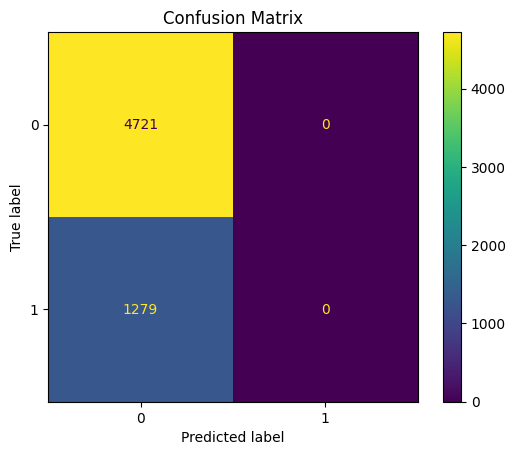

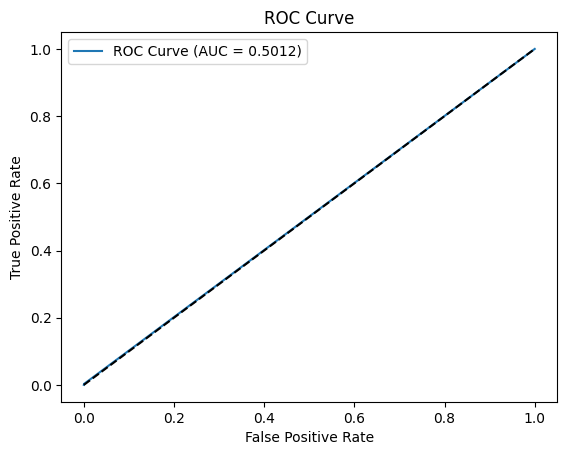

np.float64(0.0024919847258080274)

In [49]:
from src.ml.model_training import FinalModelBuilder

final_model_builder = FinalModelBuilder(
    train_data=train_woe[top_list], 
    test_data=test_data[top_list], 
    target_col=TARGET_COLUMN
)
final_model_builder.optimize_model()
final_model_builder.train_final_model()
final_model_builder.evaluate_model()

In [50]:
final_model_builder.save_model("final_model.pkl")

Модель сохранена в final_model.pkl


In [51]:
final_model_builder.save_predictions()

In [52]:
pd.read_csv('train_result.csv')

,Actual,Predicted Probability
0,0,0.182555
1,1,0.363968
2,0,0.127243
3,1,0.168367
4,0,0.392549
...,...,...
23995,0,0.171246
23996,0,0.235828
23997,0,0.151962
23998,0,0.239424


In [53]:
pd.read_csv('test_result.csv')

,Actual,Predicted Probability
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
5995,1,0.0
5996,0,0.0
5997,0,0.0
5998,0,0.0


,loan_indicator_dt_diff,account_amt_credit_limit_max,past_due_principal_missed_date_diff,past_due_int_missed_date_diff,credit_utilization_mean,past_due_principal_amt_past_due,arrear_amt_outstanding_max,past_due_int_amt_past_due,account_amt_credit_limit_mean,arrear_start_amt_outstanding,target
application_id,,,,,,,,,,,
52334521,-0.391915,0.395519,0.178423,0.174341,-0.248094,0.131627,0.317771,0.124009,0.271038,0.081633,0
52944198,0.425627,0.104430,-0.448249,-0.459703,-0.102670,-0.775648,-0.290812,-0.803664,-0.195753,-0.262179,1
53096418,0.231692,0.231130,0.178423,0.174341,0.287827,0.131627,0.317771,0.124009,0.157050,-0.060851,0
53031041,0.425627,-0.333279,0.178423,0.174341,0.113573,0.131627,-0.290812,0.124009,-0.195753,0.281573,1
52494244,-0.039126,0.231130,-0.763618,-0.683487,0.113573,-0.775648,0.098896,-0.803664,-0.195753,-0.060851,0
...,...,...,...,...,...,...,...,...,...,...,...
51541848,-0.039126,0.104430,0.178423,0.174341,0.287827,0.131627,-0.290812,0.124009,0.271038,-0.060851,0
51792262,-0.039126,0.231130,0.178423,-0.513789,0.287827,0.131627,-0.290812,-0.803664,0.271038,-0.060851,0
51997175,-0.292910,0.395519,0.178423,0.174341,0.113573,0.131627,0.317771,0.124009,0.271038,0.128483,0


In [67]:
model = LogisticRegression(**{'solver': 'lbfgs', 'C': 0.04025997846622295, 'max_iter':292})
x = train_woe[top_list].drop(columns='target')
y = train_woe['target']
model.fit(x,y)

LogisticRegression(C=0.04025997846622295, max_iter=292)

In [94]:
y_pred_proba = model.predict_proba(x)[:, 1]
auc = roc_auc_score(y, y_pred_proba)
print(f"AUC на тренировочных данных: {auc:.4f}")
print(f"GINI на тренировочных данных: {auc*2-1:.4f}")

AUC на тренировочных данных: 0.6644
GINI на тренировочных данных: 0.3288


In [95]:
x_test = test_woe[top_list].drop(columns='target')
y_test = test_woe['target']
y_pred_proba = model.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC на тестовых данных: {auc:.4f}")
print(f"GINI на тестовых данных: {auc*2-1:.4f}")

AUC на тестовых данных: 0.6546
GINI на тестовых данных: 0.3093


In [96]:
feature_importance = pd.Series(model.coef_[0], index=x.columns)
print("Важность признаков:")
print(feature_importance.sort_values(ascending=False))

Важность признаков:
past_due_int_amt_past_due             -0.113524
account_amt_credit_limit_max          -0.203045
past_due_principal_amt_past_due       -0.297710
account_amt_credit_limit_mean         -0.400170
past_due_int_missed_date_diff         -0.447656
arrear_amt_outstanding_max            -0.451832
arrear_start_amt_outstanding          -0.468987
past_due_principal_missed_date_diff   -0.485670
credit_utilization_mean               -0.535442
loan_indicator_dt_diff                -0.668885
dtype: float64


In [98]:
model.score(x_test, y_test)

0.7876666666666666

In [73]:
y_pred_proba

array([0.16938039, 0.361456  , 0.11489261, ..., 0.15062721, 0.11786556,
       0.20704941])

In [77]:
roc_auc_score(y_test, y_pred_proba)

np.float64(0.6546254412975876)

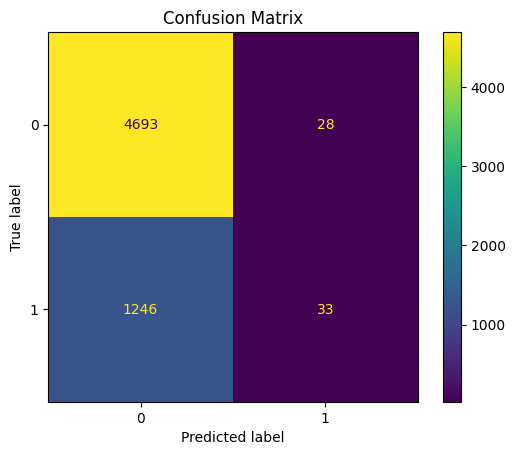

In [97]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

C:\Users\serga\AppData\Local\Temp\ipykernel_41620\3738797771.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


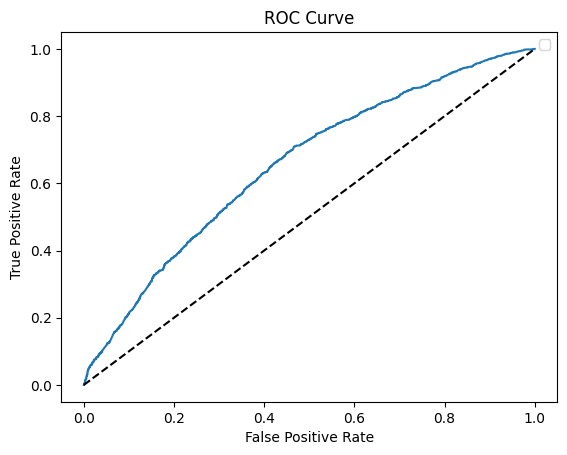

In [100]:
import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(
            np.array(y_test),
            np.array(y_pred_proba)
        )
plt.plot(
            fpr,
            tpr,
        )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()